In [14]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [15]:
!unzip drive/MyDrive/Copy\ of\ PlantVillage_Noisy_Dataset.zip > /dev/null

replace PlantVillage/Noisy_Dataset/Test_Data/Pepper__bell___Bacterial_spot/Pepper_Bacterial_690.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [16]:
import matplotlib.pyplot as plt
import torch
from torch import nn
from torch import optim
import torch.nn.functional as F
from torchvision import datasets, transforms, models
from torch.autograd import Variable
from torchvision.utils import save_image
from tqdm import tqdm

import os
import numpy as np
from glob import glob
from imageio import imread
from skimage.transform import resize

In [19]:
image_height, image_width=128,128
transf=transforms.Compose([transforms.Resize((128, 128)), transforms.ToTensor()])

noise_train=datasets.ImageFolder('./PlantVillage/Noisy_Dataset/Train_Data/', transform=transf)
pure_train=datasets.ImageFolder('./PlantVillage/Pure_Dataset/Train_Data/', transform=transf)
noise_test=datasets.ImageFolder('./PlantVillage/Noisy_Dataset/Test_Data/', transform=transf)
pure_test=datasets.ImageFolder('./PlantVillage/Pure_Dataset/Test_Data/', transform=transf)

In [20]:
train_loader = torch.utils.data.DataLoader(noise_train, batch_size=64)
pure_loader = torch.utils.data.DataLoader(pure_train, batch_size=64)

test_loader = torch.utils.data.DataLoader(noise_test, batch_size=64)
ground_loader = torch.utils.data.DataLoader(pure_test, batch_size=64)

In [21]:
class autoencoder(nn.Module):
    def __init__(self):
        super(autoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(128,100),
            nn.ReLU(),
            nn.Linear(100,70),
            nn.ReLU(),
            nn.Linear(70,50),
            nn.ReLU(),
            nn.Linear(50,30))
        self.decoder = nn.Sequential(
            nn.Linear(30,50),
            nn.ReLU(),
            nn.Linear(50,70),
            nn.ReLU(),
            nn.Linear(70,100),
            nn.ReLU(),
            nn.Linear(100,128))

    def forward(self, x):
        y = self.encoder(x)
        z = self.decoder(y)
        return z

In [22]:
use_cuda = torch.cuda.is_available()
print('Using PyTorch version:', torch.__version__, 'CUDA:', use_cuda)

device  =  torch.device("cuda" if torch.cuda.is_available() else "cpu")

Using PyTorch version: 2.1.0+cu118 CUDA: False


In [23]:
model = autoencoder().to(device)

In [24]:
# YOUR CODE HERE for declaring the loss function and optimizer

# Initialization of Mean Square Error
loss_func = nn.MSELoss()

# Initialization of Optimizer
optimizer = torch.optim.Adam(model.parameters(), lr=0.002)

In [25]:
EPOCH = 6
for epoch in range(EPOCH):
    for x, y in tqdm(zip(train_loader, pure_loader), total=len(train_loader)):
        t_x, _ = x
        t_x = t_x.to(device)
        t_y, label = y
        t_y = t_y.to(device)
        # Zero the parameter gradients
        optimizer.zero_grad()

        # Passing the data to the model (Forward Pass)
        decoded1 = model(t_x)

        # Calculating mean square error loss
        loss = loss_func(decoded1, t_y)
        train_loss = loss.item()

        # Performing backward pass (Backpropagation)
        loss.backward()

        # optimizer.step() updates the weights accordingly
        optimizer.step()


    print('Epoch: ', epoch + 1, '| train loss: %.4f' % train_loss)

100%|██████████| 47/47 [00:26<00:00,  1.79it/s]


Epoch:  1 | train loss: 0.0258


100%|██████████| 47/47 [00:24<00:00,  1.93it/s]


Epoch:  2 | train loss: 0.0209


100%|██████████| 47/47 [00:23<00:00,  2.01it/s]


Epoch:  3 | train loss: 0.0193


100%|██████████| 47/47 [00:26<00:00,  1.79it/s]


Epoch:  4 | train loss: 0.0186


100%|██████████| 47/47 [00:23<00:00,  2.02it/s]


Epoch:  5 | train loss: 0.0184


100%|██████████| 47/47 [00:25<00:00,  1.83it/s]

Epoch:  6 | train loss: 0.0184


In [26]:
imgs = []
for i in iter(noise_test):
  imgs.append(i)

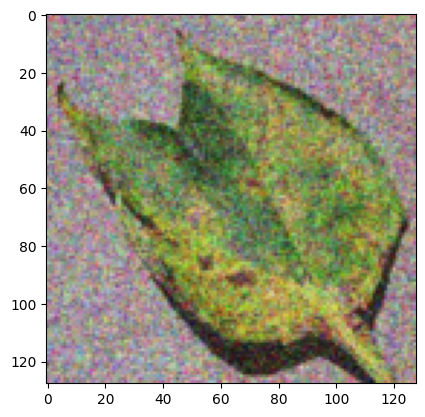

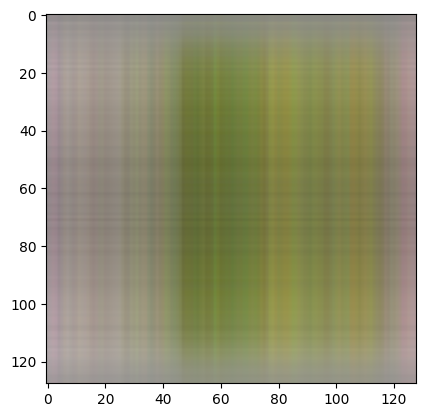

In [27]:
height = 128
width = 128
c = 30
o = imgs[c]
r = model(imgs[c][0].to(device))
plt.imshow(imgs[c][0].reshape(3, width, height).T)
plt.show()
plt.imshow(r.cpu().detach().numpy().reshape(3, width, height).T)